In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()

'c:\\Users\\danie\\OneDrive\\Documents\\Visual Studio Code'

In [6]:
# Set visual style
sns.set(style="whitegrid")

# Load CSV file
df = pd.read_csv("Customer-Churn-Records.csv")

# Display the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
# Basic info & data types
df.info()

# summary stats
df.describe()

# Check for nulls
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
# Unique values in categorical columns

df['Geography'].value_counts()
df['Gender'].value_counts()
df['Card Type'].value_counts()

# Check how many customers have churned

df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

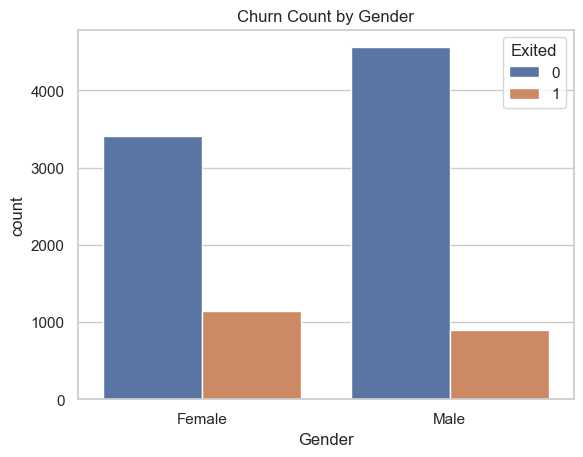

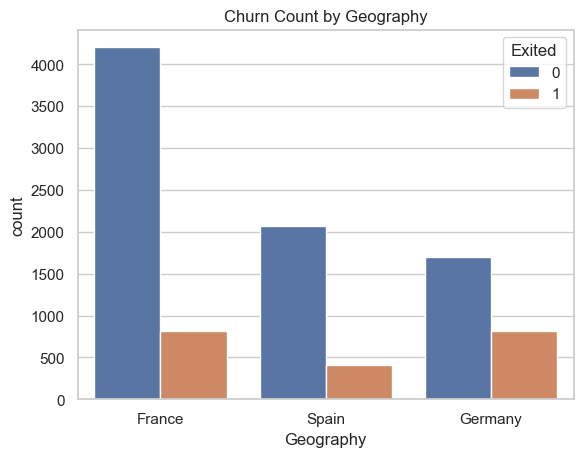

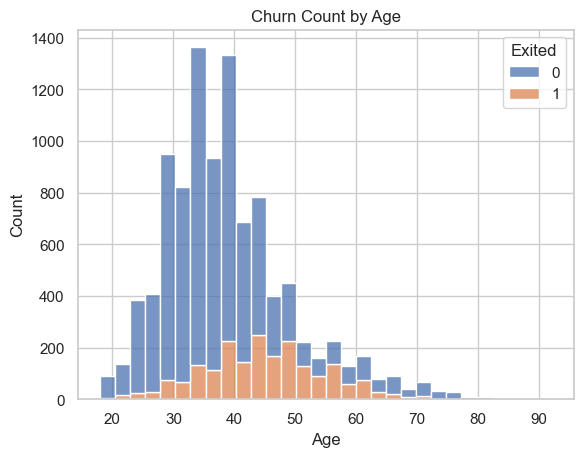

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn by gender

sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn Count by Gender')
plt.show()

# Churn by geography
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Count by Geography')
plt.show()

# Churn by age
sns.histplot(data=df, x='Age', hue='Exited', multiple="stack", bins=30)
plt.title('Churn Count by Age')
plt.show()



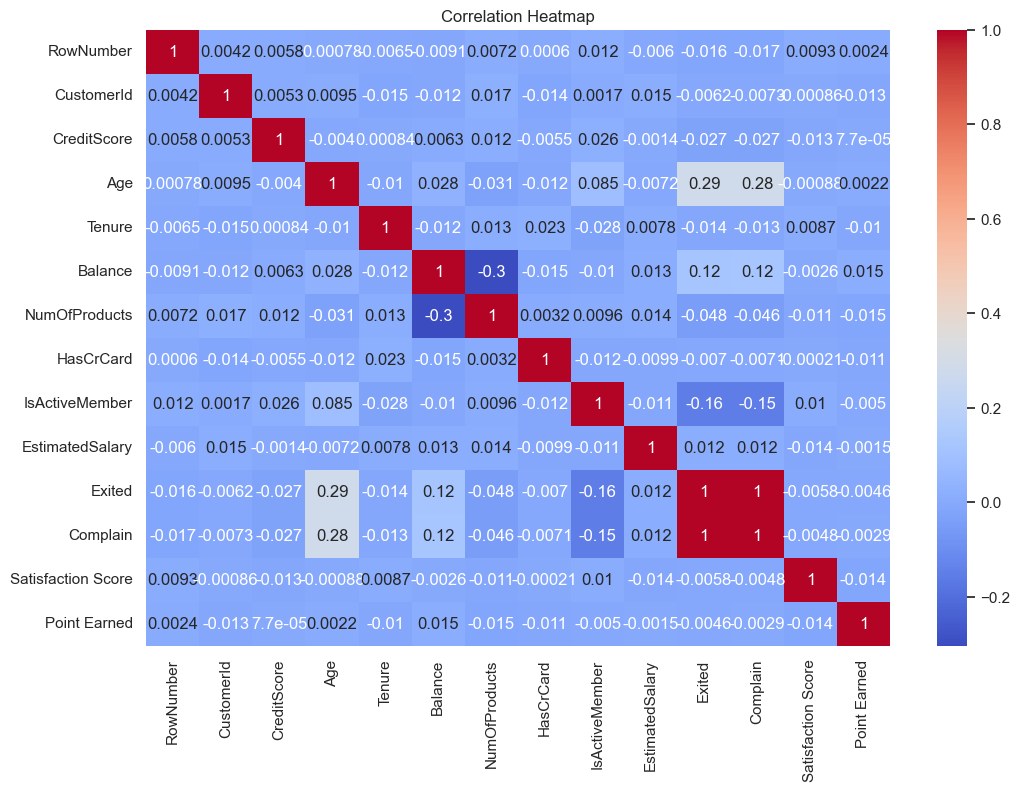

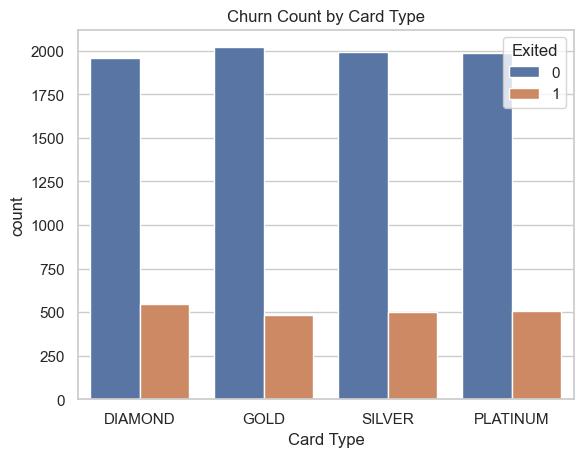

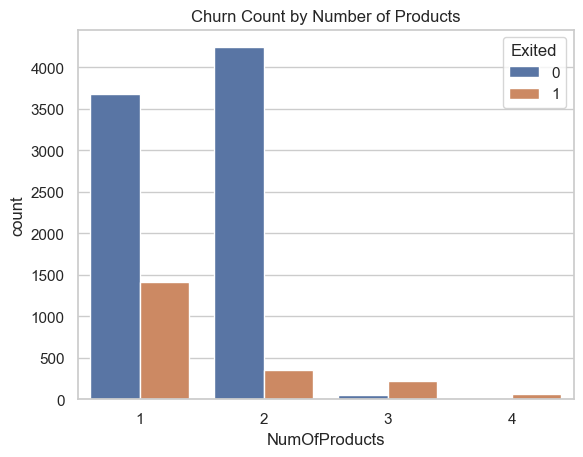

In [11]:
# Heatmap to identify which features are correlated
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Churn Rate by Card Type / Products
sns.countplot(x='Card Type', hue='Exited', data=df)
plt.title('Churn Count by Card Type')
plt.show()

sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn Count by Number of Products')
plt.show()



Accuracy: 0.999
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: title={'center': 'Top 10 Feature Importances'}>

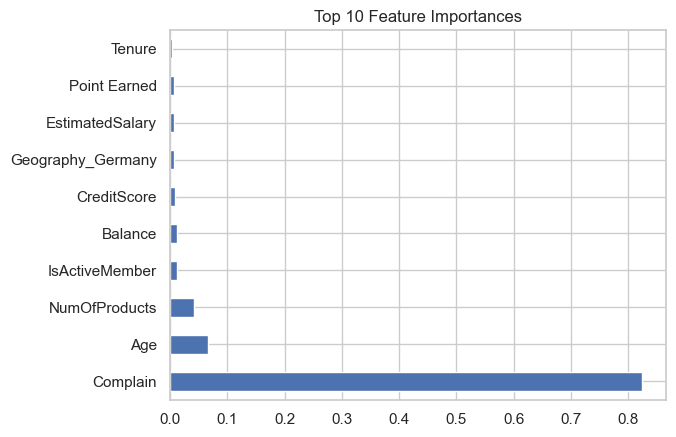

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Drop ID-like columns
df_model = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

# Separate features and target variable
X = df_model.drop('Exited', axis=1)
Y = df_model['Exited']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh', title="Top 10 Feature Importances")